In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np

pd_train = pd.read_csv('./dataset/train.csv')
pd_test = pd.read_csv('./dataset/test.csv')


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Preprocessing NaN Data
</h1>
</div>
</div>

#### Checking NaN data

In [3]:
print('training data+++++++++++++++++++++total train length: ',len(pd_train))
for i in np.arange(pd_train.shape[1]):
    n = pd_train.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(pd_train.columns.values)[i] + ': ' + str(n) + ' nans')

print('testing data++++++++++++++++++++++total test length: ',len(pd_test))
for i in np.arange(pd_test.shape[1]):
    n = pd_test.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(pd_test.columns.values)[i] + ': ' + str(n) + ' nans')

training data+++++++++++++++++++++total train length:  1460
LotFrontage: 259 nans
Alley: 1369 nans
MasVnrType: 8 nans
MasVnrArea: 8 nans
BsmtQual: 37 nans
BsmtCond: 37 nans
BsmtExposure: 38 nans
BsmtFinType1: 37 nans
BsmtFinType2: 38 nans
Electrical: 1 nans
FireplaceQu: 690 nans
GarageType: 81 nans
GarageYrBlt: 81 nans
GarageFinish: 81 nans
GarageQual: 81 nans
GarageCond: 81 nans
PoolQC: 1453 nans
Fence: 1179 nans
MiscFeature: 1406 nans
testing data++++++++++++++++++++++total test length:  1459
MSZoning: 4 nans
LotFrontage: 227 nans
Alley: 1352 nans
Utilities: 2 nans
Exterior1st: 1 nans
Exterior2nd: 1 nans
MasVnrType: 16 nans
MasVnrArea: 15 nans
BsmtQual: 44 nans
BsmtCond: 45 nans
BsmtExposure: 44 nans
BsmtFinType1: 42 nans
BsmtFinSF1: 1 nans
BsmtFinType2: 42 nans
BsmtFinSF2: 1 nans
BsmtUnfSF: 1 nans
TotalBsmtSF: 1 nans
BsmtFullBath: 2 nans
BsmtHalfBath: 2 nans
KitchenQual: 1 nans
Functional: 2 nans
FireplaceQu: 730 nans
GarageType: 76 nans
GarageYrBlt: 78 nans
GarageFinish: 78 nans
Ga

In [4]:
y_train = pd_train['SalePrice']
x_train = pd_train.drop(['Id','SalePrice'], axis=1)
x_test = pd_test.drop('Id', axis=1)

#### Fill NaN data with ffill method

In [5]:
def fill_nan_values(pd):
    pd = pd.drop(['Alley','PoolQC','Fence','MiscFeature','LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
    pd = pd.fillna(method="ffill")
    return pd
    
x_train = fill_nan_values(x_train)
x_test = fill_nan_values(x_test)

#### Visualization of remaining NaN
Seems like every NaN has gone!

<AxesSubplot:>

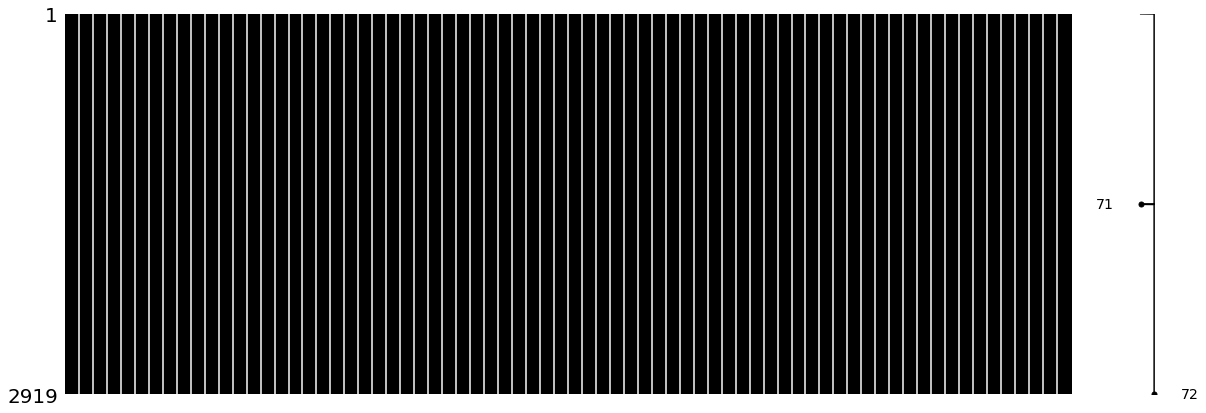

In [6]:
import missingno as msno
df = pd.concat([x_train, x_test])
msno.matrix(df=df, figsize=(20,7), color=(0,0,0))

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Categorical Data Transformation
</h1>
</div>
</div>

We will use LabelEncoder to transform categorical data into numerical data.

In [7]:
from sklearn.preprocessing import LabelEncoder

def encoder(df_train, df_test):
    En = LabelEncoder()
    df_train = En.fit_transform(df_train)
    df_test = En.transform(df_test)
    return df_train, df_test

for col in x_train:
    if x_train[col].dtypes == object:
        x_train[col],x_test[col] = encoder(x_train[col],x_test[col])

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Plotting Regplot
</h1>
</div>
</div>

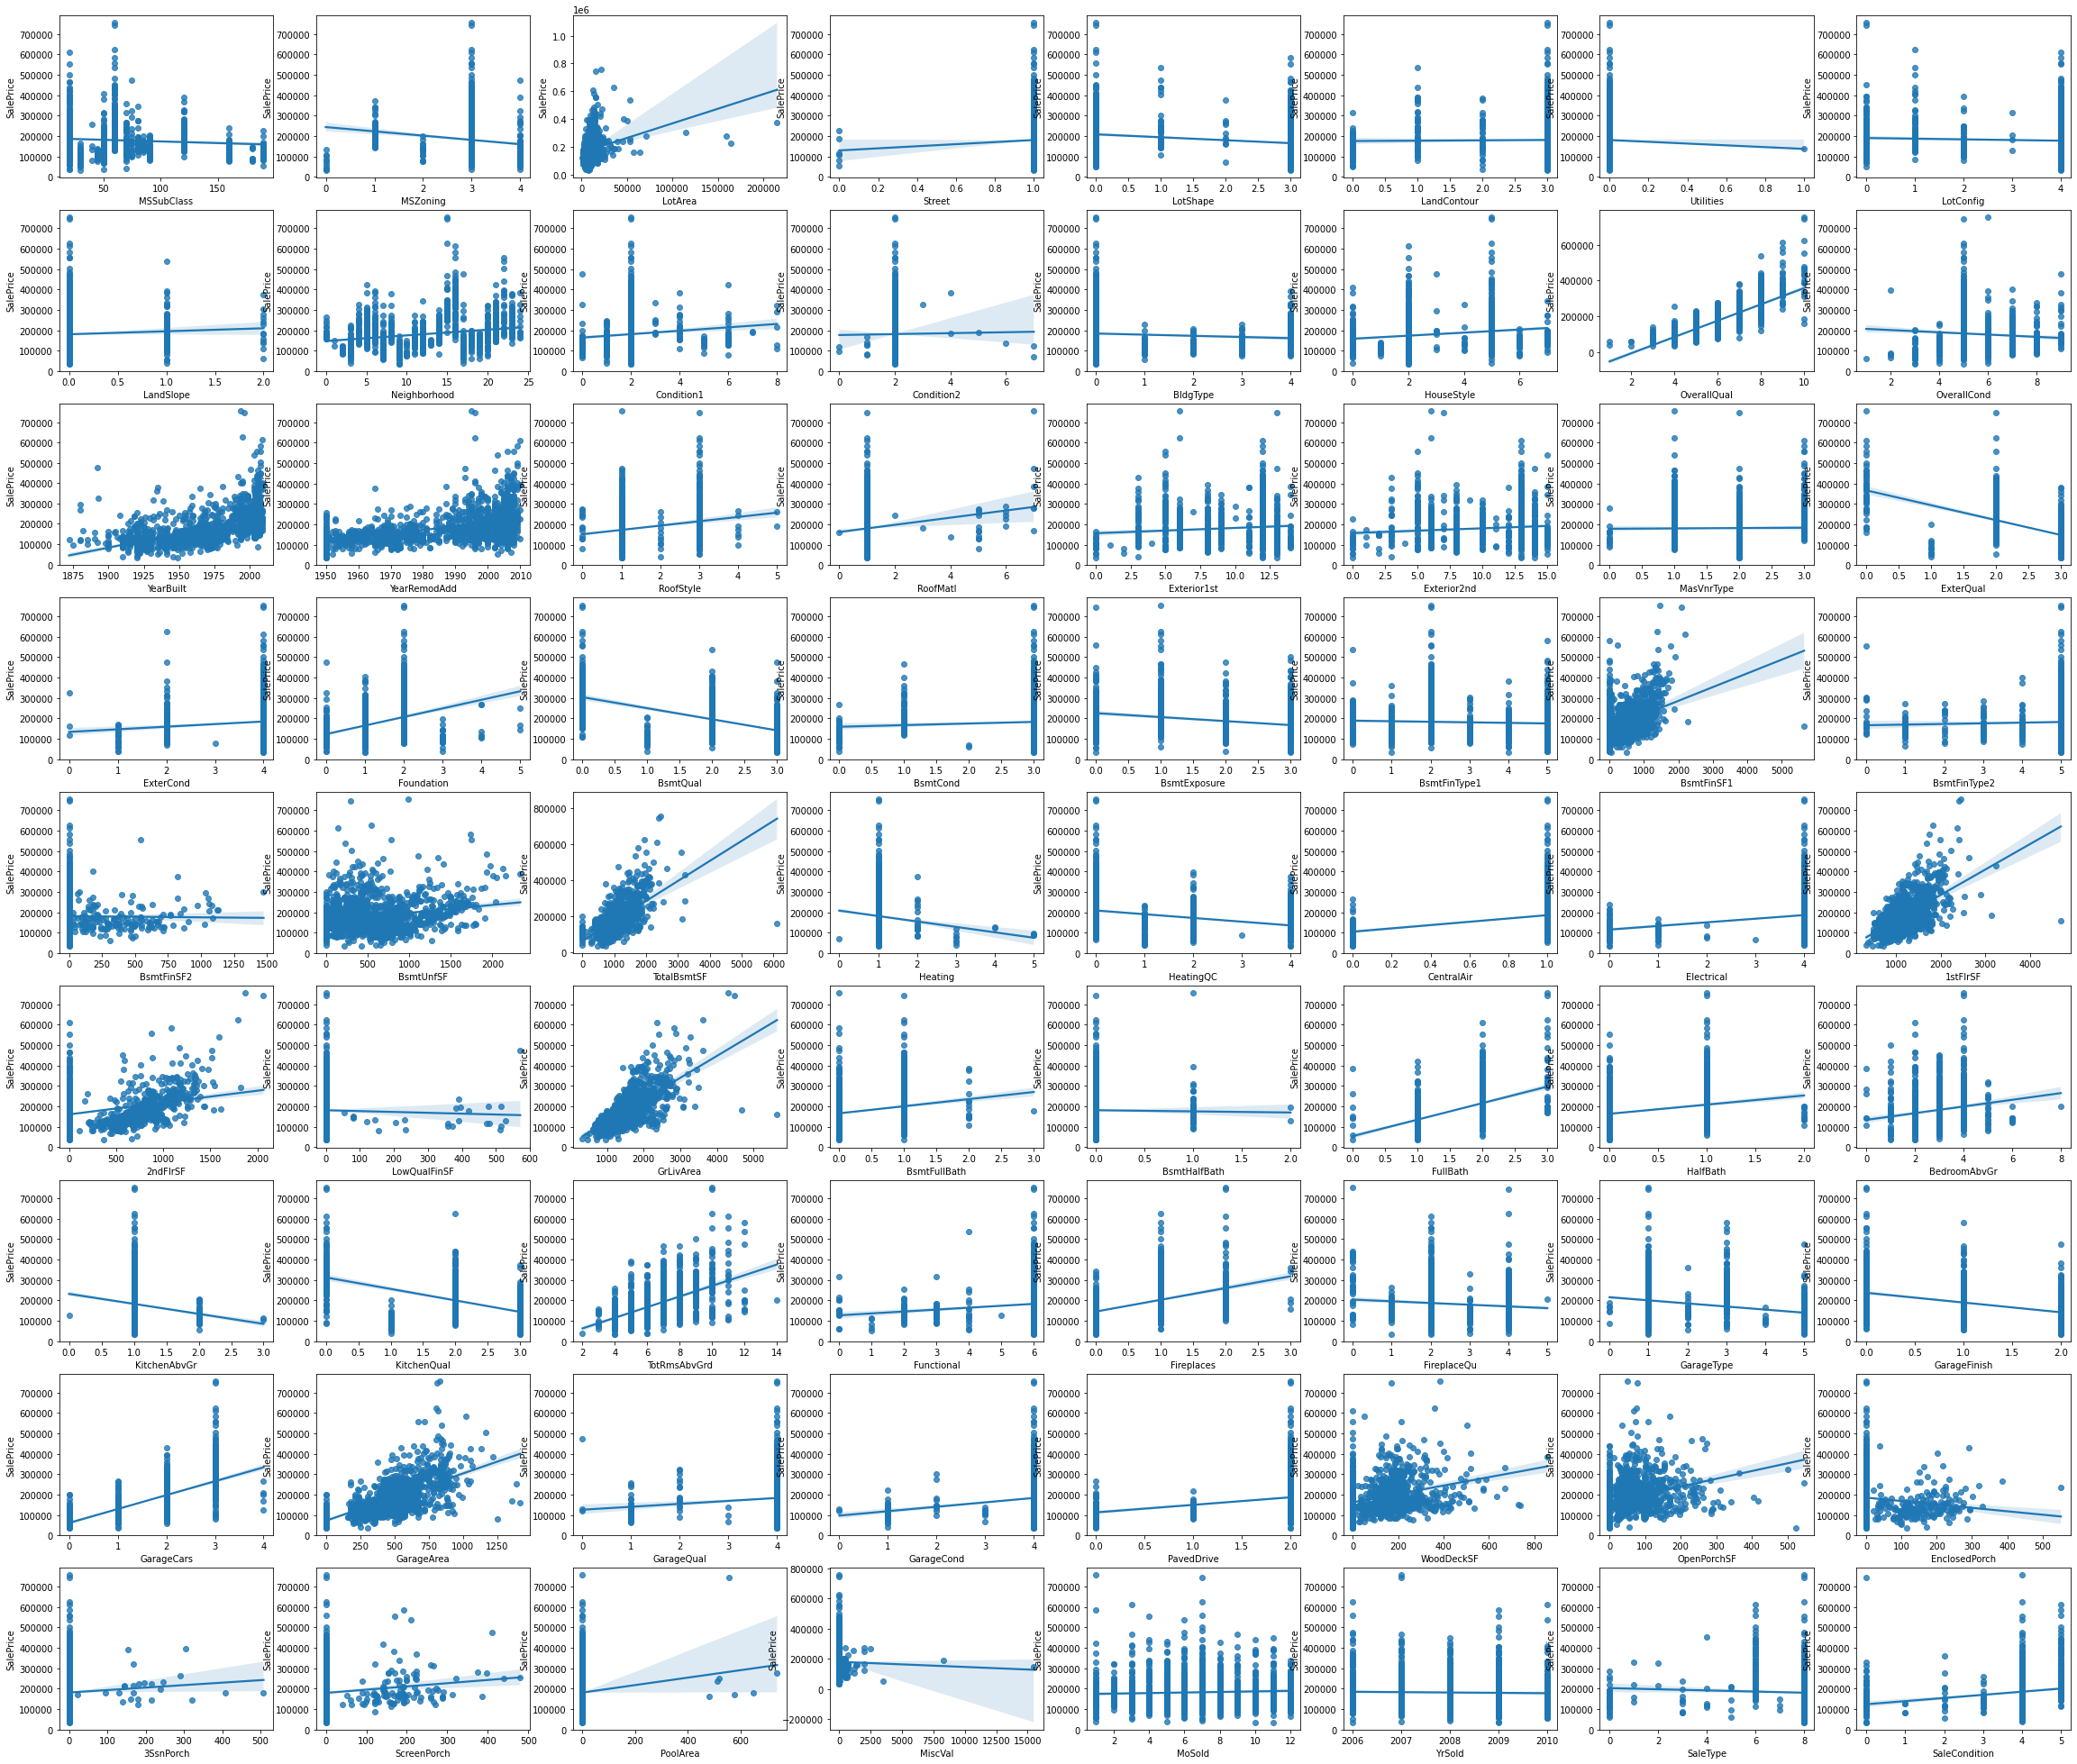

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

im = pd.concat([x_train, y_train], axis=1)
fig, axs = plt.subplots(figsize=(40,35), ncols=8, nrows=9)
col = [i for i in x_train ]
for i, features in enumerate(col):
    row = int(i/8)
    col = i%8
    sns.regplot(x=features, y='SalePrice', data=im, ax=axs[row][col])

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Considering Correlations
</h1>
</div>
</div>

Text(0.5, 1.0, 'Correlations')

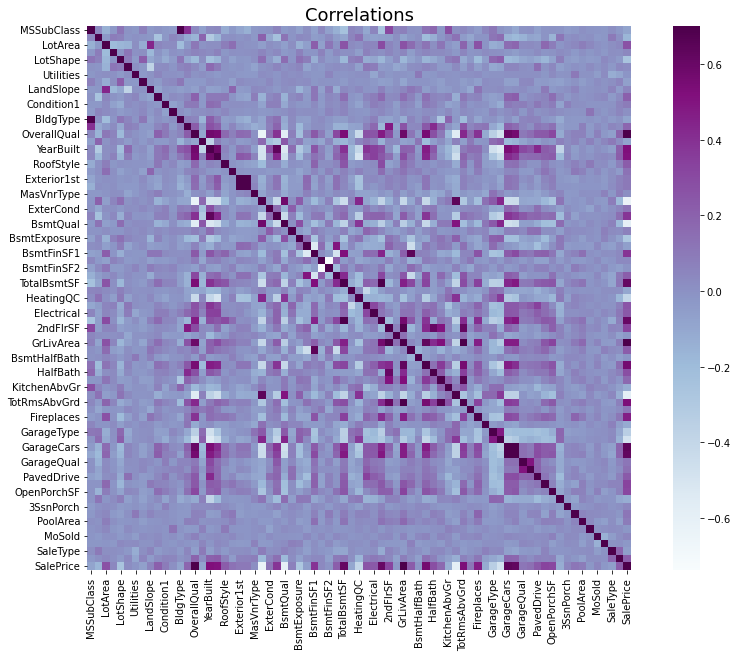

In [9]:
corr = im.corr()
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, cmap="BuPu", vmax=0.7, square=True)
ax.set_title("Correlations", fontsize = 18)

#### Remove columns whose correlation coefficient is less than or equal to an absolute value of 0.2 

In [10]:
cor = pd.DataFrame(corr.iloc[-1,:]).T
rm_col = []
for col in cor:
    if abs(cor[col][0])<=0.2:
        rm_col.append(col)
print(rm_col)

['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType']


In [11]:
x_train = x_train.drop(rm_col, axis=1)
x_test = x_test.drop(rm_col, axis=1)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Visualizing t-SNE
</h1>
</div>
</div>

#### t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map.

<img src="https://gaussian37.github.io/assets/img/ml/concept/t-sne/0.png">

#### t-SNE is effective for representing the distribution of class-divided data like MNIST as shown in the figure above, but it can be used sufficiently for regression problems like this dataset.  
#### In this notebook, we are going to plot in 3D for more visualization effects, using Plotly.

In [12]:
from sklearn.manifold import TSNE
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings('ignore')

data = np.array(x_train)

n_components = 3
model = TSNE(n_components=n_components)
transformed = model.fit_transform(data.data)

fig = px.scatter_3d(
    transformed, x=0, y=1, z=2,
    color=y_train
)
fig.update_traces(marker_size=3)
iplot(fig)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Data Normalization and Data Split
</h1>
</div>
</div>

In [13]:
x_train = np.log1p(x_train)
x_test = np.log1p(x_test)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Training Three Models with GridSearchCV
</h1>
</div>
</div>

#### We are going to compare three diffenent models XGBRegressor, Lasso Regression, ElasticNet using GridSearchCV

In [15]:
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, ElasticNet

def train(method, x_train, y_train):
    
    xgb_reg = xgboost.XGBRegressor()
    lasso_reg = Lasso()
    elastic_reg = ElasticNet()
    
    model = [xgb_reg, lasso_reg, elastic_reg]
    
    if method == 'XGBRegressor':
        reg = model[0]
        param_grid = [{'booster':['gbtree', 'dart'], 'max_depth':[1,2,5,10,20,50,100]}]
        
    elif method == 'Lasso':
        reg = model[1]
        param_grid = [{'alpha':[0.01,0.1,1.0,2.0], 'max_iter':[1,10,50,100,500]}]
    
    elif method == 'ElasticNet':
        reg = model[2]
        param_grid = [{'alpha':[0.01,0.1,1.0,2.0], 'max_iter':[1,10,50,100,500], 'l1_ratio':[0.01,0.1,1.0,2.0]}]
    else:
        print("Choose one from XGBRegressor, Lasso, ElasticNet")
    
    grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', verbose=1)
    grid_search.fit(x_train, y_train)
    
    best_model = grid_search.best_estimator_
    print('GridSearchCV {} Best Params:'.format(method), grid_search.best_params_)
    
    return best_model

In [16]:
def visualize(method, RMSE, y_pred, y_val):
    ax, fig = plt.subplots(figsize=(10,8))
    plt.plot(y_pred, 'b.', marker='*')
    plt.plot(y_val.reset_index(drop=True), 'r.')
    x = np.linspace(0,len(y_pred),num=len(y_pred))
    m, b = np.polyfit(x, y_pred, 1)
    plt.plot(x, m*x+b, 'g')
    m, b = np.polyfit(x, y_val, 1)
    plt.plot(x, m*x+b, 'm--')
    plt.legend(['Prediction', 'Ground Truth', 'Prediction Line', 'GT Line'])
    plt.title('Model : {}, RMSE : {}'.format(method, RMSE))
    plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV XGBRegressor Best Params: {'booster': 'gbtree', 'max_depth': 5}


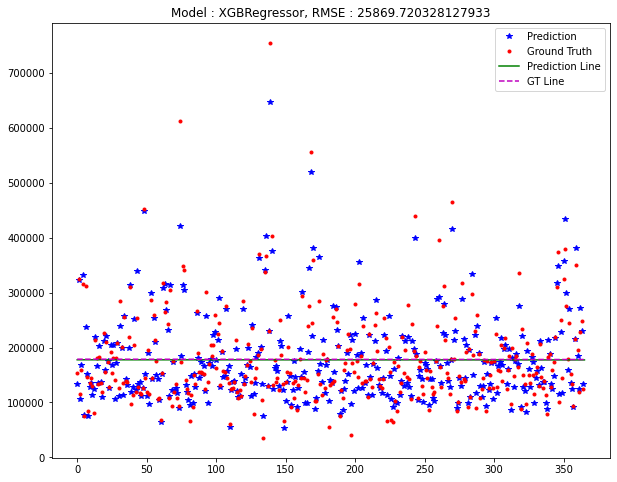

 33%|███▎      | 1/3 [01:06<02:13, 66.80s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV Lasso Best Params: {'alpha': 2.0, 'max_iter': 100}


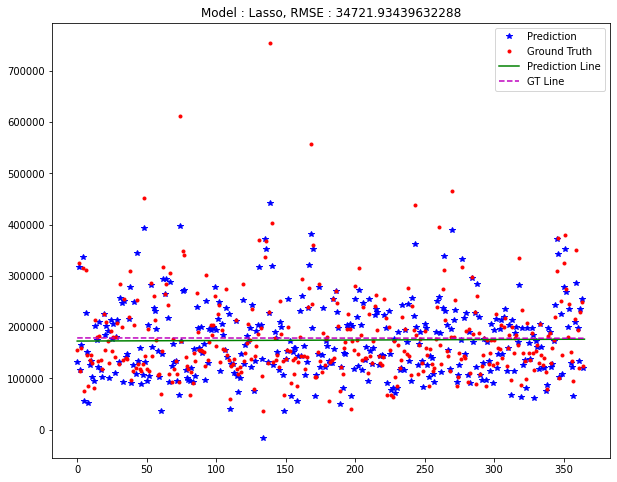

 67%|██████▋   | 2/3 [01:08<00:28, 28.40s/it]

Fitting 5 folds for each of 80 candidates, totalling 400 fits
GridSearchCV ElasticNet Best Params: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100}


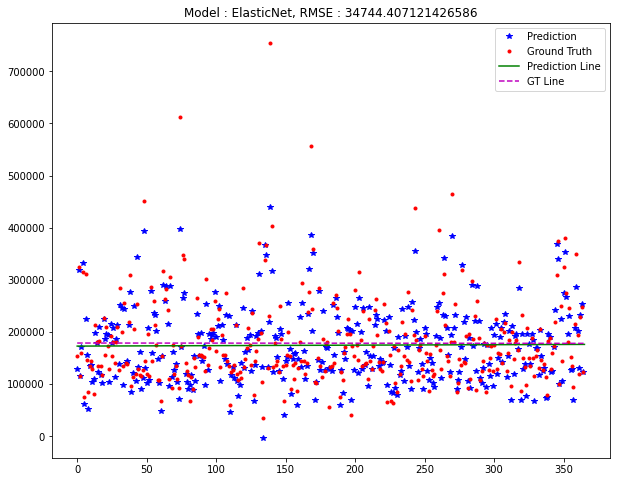

100%|██████████| 3/3 [01:11<00:00, 23.98s/it]


In [17]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

models = ['XGBRegressor', 'Lasso', 'ElasticNet']

for method in tqdm(models):
    best_model = train(method,x_train, y_train)
    y_pred = best_model.predict(x_val)
    RMSE = mean_squared_error(y_val, y_pred)**0.5
    visualize(method, RMSE, y_pred, y_val)

## Seems like XGBRegressor works the best!👍